In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
df.shape

(285331, 14)

In [5]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Junction Detail

In [5]:
df_jdac = df[['junction_detail', 'accident_severity']]
df_jdac

,junction_detail,accident_severity
0,3,3
1,6,3
6,6,3
7,6,3
8,3,3
...,...,...
285307,3,3
285312,5,3
285313,5,3
285314,5,3


In [6]:
df_jdac['junction_detail'].unique()

array([3, 6, 8, 9, 7, 1, 5, 2, 0], dtype=int64)

In [19]:
df_jdac['junction_detail'].value_counts()

t junction         57108
crossroads         19322
roundabout         16174
private drive       7199
other junction      3895
slip road           3349
mini-roundabout     2404
4+ arm junction     1387
no junction            4
Name: junction_detail, dtype: int64

In [7]:
df_jdac['junction_detail'].replace(0, 'no junction', inplace=True)
df_jdac['junction_detail'].replace(1, 'roundabout', inplace=True)
df_jdac['junction_detail'].replace(2, 'mini-roundabout', inplace=True)
df_jdac['junction_detail'].replace(3, 't junction', inplace=True)
df_jdac['junction_detail'].replace(5, 'slip road', inplace=True)
df_jdac['junction_detail'].replace(6, 'crossroads', inplace=True)
df_jdac['junction_detail'].replace(7, '4+ arm junction', inplace=True)
df_jdac['junction_detail'].replace(8, 'private drive', inplace=True)
df_jdac['junction_detail'].replace(9, 'other junction', inplace=True)

df_jdac['junction_detail'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array(['t junction', 'crossroads', 'private drive', 'other junction',
       '4+ arm junction', 'roundabout', 'slip road', 'mini-roundabout',
       'no junction'], dtype=object)

In [8]:
df_jdac3 = df_jdac[df_jdac['accident_severity'] == 3]
df_jdac2 = df_jdac[df_jdac['accident_severity'] == 2]
df_jdac1 = df_jdac[df_jdac['accident_severity'] == 1]

df_jdac3

,junction_detail,accident_severity
0,t junction,3
1,crossroads,3
6,crossroads,3
7,crossroads,3
8,t junction,3
...,...,...
285307,t junction,3
285312,slip road,3
285313,slip road,3
285314,slip road,3


In [9]:
print(df_jdac3['junction_detail'].unique())
print(df_jdac2['junction_detail'].unique())
print(df_jdac1['junction_detail'].unique())

['t junction' 'crossroads' 'private drive' 'other junction'
 '4+ arm junction' 'roundabout' 'slip road' 'mini-roundabout'
 'no junction']
['t junction' 'roundabout' 'private drive' 'crossroads' '4+ arm junction'
 'mini-roundabout' 'other junction' 'slip road' 'no junction']
['t junction' 'crossroads' 'other junction' 'roundabout' '4+ arm junction'
 'mini-roundabout' 'private drive' 'slip road']


In [10]:
print(df_jdac3['junction_detail'].value_counts())


t junction         49301
crossroads         16937
roundabout         14711
private drive       6031
other junction      3358
slip road           2960
mini-roundabout     2167
4+ arm junction     1218
no junction            3
Name: junction_detail, dtype: int64


In [11]:
y3 = df_jdac3['junction_detail'].value_counts()
y3.to_frame()
df_jdactot = pd.DataFrame({'accident severity 3': y3})
df_jdactot

,accident severity 3
t junction,49301
crossroads,16937
roundabout,14711
private drive,6031
other junction,3358
slip road,2960
mini-roundabout,2167
4+ arm junction,1218
no junction,3


In [12]:
y2 = df_jdac2['junction_detail'].value_counts()
y2.to_list()
df_jdactot.insert(1, 'accident severity 2', y2, True)
df_jdactot

,accident severity 3,accident severity 2
t junction,49301,7342
crossroads,16937,2232
roundabout,14711,1398
private drive,6031,1088
other junction,3358,484
slip road,2960,345
mini-roundabout,2167,229
4+ arm junction,1218,159
no junction,3,1


In [13]:
y1 = df_jdac1['junction_detail'].value_counts()
y1

t junction         465
crossroads         153
private drive       80
roundabout          65
other junction      53
slip road           44
4+ arm junction     10
mini-roundabout      8
Name: junction_detail, dtype: int64

In [14]:
y1 = [465, 153, 65, 80, 53, 44, 8, 10, 0]

In [15]:
df_jdactot.insert(2, 'accident severity 1', y1, True)
df_jdactot

,accident severity 3,accident severity 2,accident severity 1
t junction,49301,7342,465
crossroads,16937,2232,153
roundabout,14711,1398,65
private drive,6031,1088,80
other junction,3358,484,53
slip road,2960,345,44
mini-roundabout,2167,229,8
4+ arm junction,1218,159,10
no junction,3,1,0


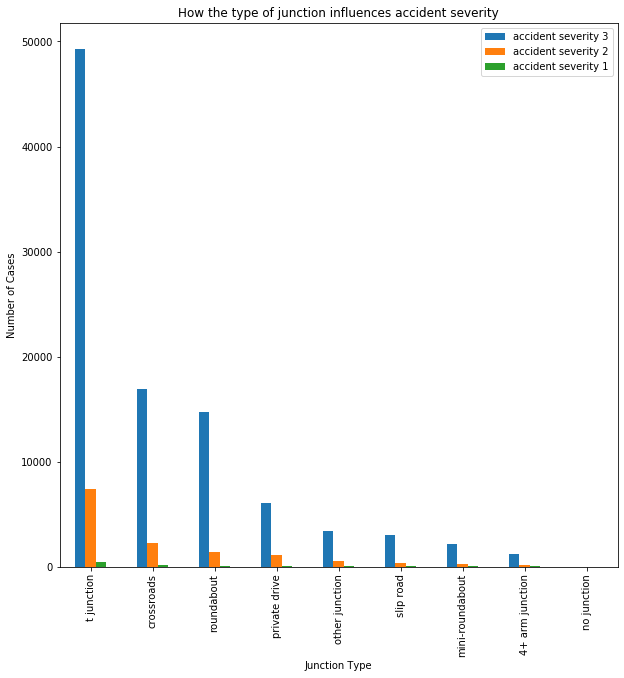

In [16]:
df_jdactot.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Junction Type')
plt.ylabel('Number of Cases')
plt.title('How the type of junction influences accident severity')
plt.show()

In [17]:
df_jdactot_mod = df_jdactot
df_jdactot_mod['accident severity 3'].replace(49301, 0, inplace=True)
df_jdactot_mod

,accident severity 3,accident severity 2,accident severity 1
t junction,0,7342,465
crossroads,16937,2232,153
roundabout,14711,1398,65
private drive,6031,1088,80
other junction,3358,484,53
slip road,2960,345,44
mini-roundabout,2167,229,8
4+ arm junction,1218,159,10
no junction,3,1,0


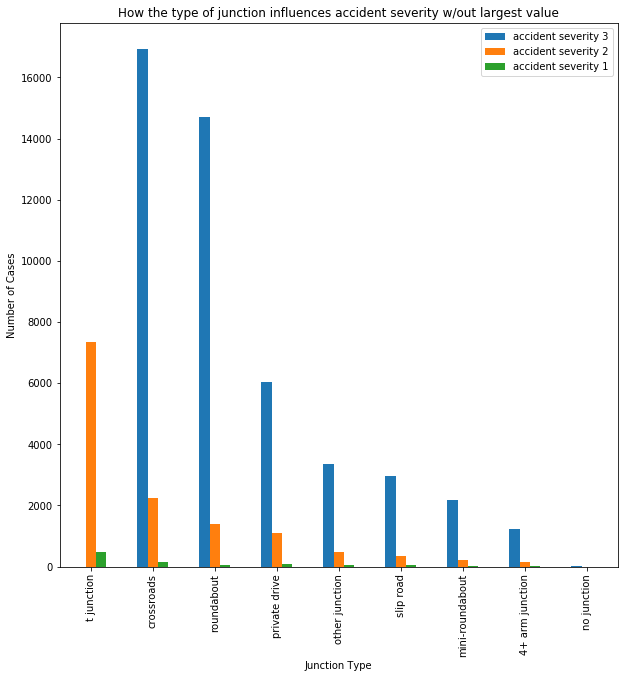

In [18]:
df_jdactot_mod.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Junction Type')
plt.ylabel('Number of Cases')
plt.title('How the type of junction influences accident severity w/out largest value')
plt.show()